# exercise 1: pdb to coordinate (missing residue, ATOM  )

In [1]:
import numpy as np

In [2]:
res31 = {'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F',
         'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L',
         'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R',
         'SER': 'S', 'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y',
         'ASX': 'N', 'GLX': 'Q', 'UNK': 'X', 'INI': 'K', 'AAR': 'R',
         'ACE': 'X', 'ACY': 'G', 'AEI': 'T', 'AGM': 'R', 'ASQ': 'D',
         'AYA': 'A', 'BHD': 'D', 'CAS': 'C', 'CAY': 'C', 'CEA': 'C',
         'CGU': 'E', 'CME': 'C', 'CMT': 'C', 'CSB': 'C', 'CSD': 'C',
         'CSE': 'C', 'CSO': 'C', 'CSP': 'C', 'CSS': 'C', 'CSW': 'C',
         'CSX': 'C', 'CXM': 'M', 'CYG': 'C', 'CYM': 'C', 'DOH': 'D',
         'EHP': 'F', 'FME': 'M', 'FTR': 'W', 'GL3': 'G', 'H2P': 'H',
         'HIC': 'H', 'HIP': 'H', 'HTR': 'W', 'HYP': 'P', 'KCX': 'K',
         'LLP': 'K', 'LLY': 'K', 'LYZ': 'K', 'M3L': 'K', 'MEN': 'N',
         'MGN': 'Q', 'MHO': 'M', 'MHS': 'H', 'MIS': 'S', 'MLY': 'K',
         'MLZ': 'K', 'MSE': 'M', 'NEP': 'H', 'NPH': 'C', 'OCS': 'C',
         'OCY': 'C', 'OMT': 'M', 'OPR': 'R', 'PAQ': 'Y', 'PCA': 'Q',
         'PHD': 'D', 'PRS': 'P', 'PTH': 'Y', 'PYX': 'C', 'SEP': 'S',
         'SMC': 'C', 'SME': 'M', 'SNC': 'C', 'SNN': 'D', 'SVA': 'S',
         'TPO': 'T', 'TPQ': 'Y', 'TRF': 'W', 'TRN': 'W', 'TRO': 'W',
         'TYI': 'Y', 'TYN': 'Y', 'TYQ': 'Y', 'TYS': 'Y', 'TYY': 'Y',
         'YOF': 'Y', 'FOR': 'X', '---': '-', 'PTR': 'Y', 'LCX': 'K',
         'SEC': 'D', 'MCL': 'K', 'LDH': 'K'}

res20 = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE',
         'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

res13 = {'A': 'ALA', 'R': 'ARG', 'N': 'ASN', 'D': 'ASP', 'C': 'CYS',
         'Q': 'GLN', 'E': 'GLU', 'G': 'GLY', 'H': 'HIS', 'I': 'ILE',
         'L': 'LEU', 'K': 'LYS', 'M': 'MET', 'F': 'PHE', 'P': 'PRO',
         'S': 'SER', 'T': 'THR', 'W': 'TRP', 'Y': 'TYR', 'V': 'VAL',
         'X': 'UNK'}

Amino_type = "ARNDCQEGHILKMFPSTWYVX"

In [3]:
input_file = 'pdb/3HMM.pdb'
fp = open(input_file)
lines = fp.readlines()
fp.close()

chain_dict = dict()
chain_seq_dict = dict()
chain_CA_dict = dict()
chain_CB_dict = dict()

check = False
for line in lines:
    if line[0:10] == 'REMARK 465':
        if line[15:27] == 'RES C SSSEQI':
            check = True
            continue
        if not check :
            continue
        res = line[15:18]
        chain_id = line[19]
        res_num = line[22:26]
        insertion_code = line[26]
        res_num2 = line[22:27]

        if chain_id not in chain_dict:
            chain_dict[chain_id] = dict()
            chain_CA_dict[chain_id] = dict()
            chain_CB_dict[chain_id] = dict()
        chain_dict[chain_id][res_num2] = res
    if line[0:6] == 'ATOM  ':
        res = line[17:20]
        chain_id = line[21]
        res_num = line[22:26]
        res_num2 = line[22:27]
        atom_type = line[12:16]

        if chain_id not in chain_dict:
            chain_dict[chain_id] = dict()
            chain_CA_dict[chain_id] = dict()
            chain_CB_dict[chain_id] = dict()
        if res_num2 not in chain_dict[chain_id]:
            chain_dict[chain_id][res_num2] = res
        if atom_type == ' CA ':
            position = np.array([float(line[30:38]),float(line[38:46]),float(line[46:54])])
            chain_CA_dict[chain_id][res_num2] = position
            if res == 'GLY' : 
                chain_CB_dict[chain_id][res_num2] = position
        if atom_type == ' CB ' :
            position = np.array([float(line[30:38]),float(line[38:46]),float(line[46:54])])
            chain_CB_dict[chain_id][res_num2] = position
        
#print(chain_dict)

for chain_id in chain_dict.keys():
    res_num_list = sorted(chain_dict[chain_id].keys())
    for res_num2 in res_num_list:
        if res_num2 not in chain_CB_dict[chain_id]:
            print(res_num2, chain_dict[chain_id][res_num2], 'missing')
            continue
        print(res_num2, chain_dict[chain_id][res_num2], chain_CB_dict[chain_id][res_num2])

   1  ILE [ 8.599 54.577 -5.669]
   2  ALA [12.177 53.812 -2.059]
   3  ARG [11.544 50.826 -6.589]
   4  THR [13.502 54.235 -9.772]
   5  ILE [15.49  57.006 -5.063]
   6  VAL [20.683 56.266 -7.523]
   7  LEU [21.828 56.982 -1.819]
   8  GLN [24.331 61.021 -5.068]
   9  GLU [26.216 63.137 -1.464]
  10  SER [26.181 61.069  3.815]
  11  ILE [23.127 65.987  2.689]
  12  GLY [23.043 65.045  7.38 ]
  13  LYS [22.47  62.744 11.372]
  14  GLY [17.986 63.663 11.709]
  15  ARG [15.476 63.39  15.866]
  16  PHE [15.412 58.714 14.398]
  17  GLY [17.771 58.307 10.535]
  18  GLU [21.433 58.758  7.621]
  19  VAL [19.287 63.692  5.641]
  20  TRP [20.825 60.244  1.276]
  21  ARG [22.072 64.537 -1.893]
  22  GLY [19.514 61.084 -4.   ]
  23  LYS [19.658 60.957 -8.696]
  24  TRP [13.867 60.683 -7.988]
  25  ARG [ 13.575  60.124 -12.957]
  26  GLY [ 17.981  62.303 -12.803]
  27  GLU [ 14.772  65.049 -10.467]
  28  GLU [18.782 66.659 -6.751]
  29  VAL [14.573 63.566 -4.365]
  30  ALA [15.917 65.484  0.603]
 

# exercise 2: pdb to distance map (missing residue, ATOM  )

In [29]:

for chain_id in chain_dict.keys():
    res_num_list = sorted(chain_dict[chain_id].keys())
    num_res = len(res_num_list)
    dist_map = np.full([num_res,num_res], 100.0)
    for i in range(num_res):
        res_num2i = res_num_list[i]
        if res_num2i not in chain_CB_dict[chain_id]:
            continue
        pos1 = chain_CB_dict[chain_id][res_num2i]
        dist_map[i][i] = 0
        for j in range(i+1, num_res):
            res_num2j = res_num_list[j]
            if res_num2j not in chain_CB_dict[chain_id]:
                continue
            pos2 = chain_CB_dict[chain_id][res_num2j]
            dist = np.linalg.norm(pos2 - pos1)
            dist_map[i][j] = dist
            dist_map[j][i] = dist

In [30]:
print(dist_map[:10,:10])

[[ 0.          5.13998142  4.85689469  6.40242001  7.33165452 12.34151907
  13.98617053 17.01123632 20.0328309  21.00521469]
 [ 5.13998142  0.          5.46239737  7.83740537  5.49560015 10.40333831
  10.16111711 14.44795757 16.8642572  16.83092217]
 [ 4.85689469  5.46239737  0.          5.05831336  7.48945873 10.67648243
  12.89999581 16.42433667 19.82659653 20.6737523 ]
 [ 6.40242001  7.83740537  5.05831336  0.          5.81422961  7.79421086
  11.83716579 13.61780647 17.60438195 19.800686  ]
 [ 7.33165452  5.49560015  7.48945873  5.81422961  0.          5.79365593
   7.11999691  9.7099707  12.86814043 14.47840924]
 [12.34151907 10.40333831 10.67648243  7.79421086  5.79365593  0.
   5.86168039  6.47649241 10.70215917 13.48506793]
 [13.98617053 10.16111711 12.89999581 11.83716579  7.11999691  5.86168039
   0.          5.75626016  7.56733731  8.20939303]
 [17.01123632 14.44795757 16.42433667 13.61780647  9.7099707   6.47649241
   5.75626016  0.          4.5847025   9.07372542]
 [20.032

In [27]:
dist = dist_map[0,1]

In [32]:
import matplotlib.pyplot as plt

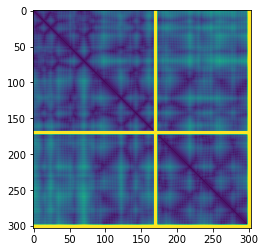

In [33]:
fig = plt.imshow(dist_map)